# Heart Disease

Heart Disease | Prediction
- | -
<img src="health-robot.jpg" width="240px"> | <img src="heart-attack.jpg" width="300px"> 

# Importando las librerias

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import sys

import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers.core import Dense

from IPython.display import HTML

# Cargando los datos

In [3]:
trainx = pd.read_csv("./heart.csv")

In [4]:
trainx.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
trainx.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Significado de los atributos
<ul>
    <li>
        <h3>Age:</h3>
        Edad de la persona
    </li>
    <li>
        <h3>Sex:</h3>
        Sexo de la persona (1 para hombre, 0 para mujer)
    </li>
    <li>
        <h3>cp:</h3>
        Chest pain experienced - Experencia de dolor en el pecho
        0: angino tipico <br>
        1: angina atipico<br>
        2: Dolor no anginal<br>
        3: asymptomatico       
    </li>
        <li>
        <h3>trestbps:</h3>
        La presión arterial en reposo de la persona
    </li>
        <li>
        <h3>chol:</h3>
        Colesterol de la persona (mg/dl)
    </li>
        <li>
        <h3>fbs:</h3>
        El azúcar en sangre de la persona en ayunas (> 120 mg/dl, 1: true; 0: false) 
    </li>
        <li>
        <h3>restecg:</h3>
        resting electrocardiographic results <br>
        0: normal<br>
        1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
        2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    </li>
        <li>
        <h3>thalach:</h3>
        El registro de la frecuencia cardíaca máxima de la persona
    </li>
        <li>
        <h3>Exang:</h3>
         Angina inducida por ejercicio (1: si; 0: no)
    </li>
    <li>
        <h3>oldpeak:</h3>
         Depresión del ST inducida por el ejercicio relativo al descanso
    </li>
    <li>
        <h3>slope:</h3>
         la pendiente del segmento pico del ejercicio ST<br>
         0: pendiente ascendente<br>
         1: plano<br>
         2: pendiente descendente<br>
    </li>
    <li>
        <h3>ca:</h3>
         El número de vasos principales (0-3)
    </li>
    <li>
        <h3>thal:</h3>
         Trastorno sanguíneo conocido como talasemia<br>
         3: normal<br>
         6: defecto fijo<br>
         7: efecto reversible
    </li>
       <li>
        <h3>Desease:</h3>
         0: No Enfermo<br>
         1: Enfermo
    </li> 
    
</ul>

In [6]:
# NAS
# trainx["age"] = trainx["age"].fillna(trainx["age"].median())
# trainx["cp"] = trainx["cp"].fillna(trainx["cp"].median())
# trainx["trestbps"] = trainx["trestbps"].fillna(trainx["trestbps"].median())
# trainx["chol"] = trainx["chol"].fillna(trainx["chol"].median())
# trainx["thalach"] = trainx["thalach"].fillna(trainx["thalach"].median())
# trainx["oldpeak"] = trainx["oldpeak"].fillna(trainx["oldpeak"].median())

In [7]:
# Category types
# trainx['sex'] = trainx['sex'].astype('category')
# trainx['cp'] = trainx['cp'].astype('category')
# trainx['fbs'] = trainx['fbs'].astype('category')
# trainx['restecg'] = trainx['restecg'].astype('category')
# trainx['exang'] = trainx['exang'].astype('category')
# trainx['slope'] = trainx['slope'].astype('category')
# trainx['thal'] = trainx['thal'].astype('category')
# trainx['ca'] = trainx['ca'].astype('category')
# trainx['target'] = trainx['target'].astype('category')

print(trainx.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


<h3>Datos completos</h3>

In [8]:
print(trainx.isnull().sum())
print("------------------")
print(trainx.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
------------------
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


# Gráficas de los datos

<h2>Histogramas</h2>

Variables:

<ul>
    <li>
    Age
    </li>
    <li>
    Trestbps
    </li>
    <li>
    chol
    </li>
    <li>
    Thalach
    </li>
    <li>
    Oldpeak
    </li>
</ul>

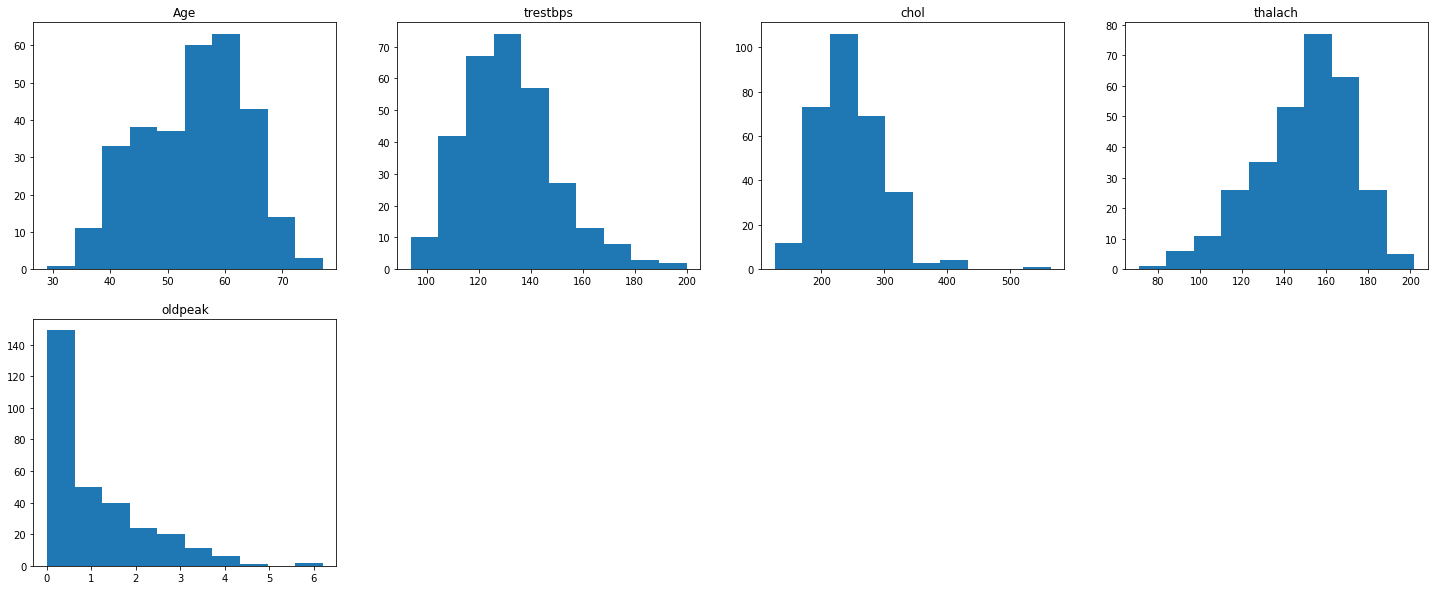

In [9]:
counts, bins = np.histogram(trainx["age"])
counts2, bins2 = np.histogram(trainx["trestbps"])
counts3, bins3 = np.histogram(trainx["chol"])
counts4, bins4 = np.histogram(trainx["thalach"])
counts5, bins5 = np.histogram(trainx["oldpeak"])

plt.figure(figsize=(25,10))

plt.subplot(2, 4, 1)
plt.hist(bins[:-1], bins, weights=counts)
plt.title('Age')
plt.ylabel('')

plt.subplot(2, 4, 2)
plt.hist(bins2[:-1], bins2, weights=counts2)
plt.title('trestbps')
plt.ylabel('')

plt.subplot(2, 4, 3)
plt.hist(bins3[:-1], bins3, weights=counts3)
plt.title('chol')
plt.ylabel('')

plt.subplot(2, 4, 4)
plt.hist(bins4[:-1], bins4, weights=counts4)
plt.title('thalach')
plt.ylabel('')

plt.subplot(2, 4, 5)
plt.hist(bins5[:-1], bins5, weights=counts5)
plt.title('oldpeak')
plt.ylabel('')


plt.show()

<h2>Tortas</h2>

Variables:

<ul>
    <li>
    Sex
    </li>
    <li>
    Fbs
    </li>
    <li>
    Restecg
    </li>
    <li>
    Exang
    </li>
    <li>
    Thal
    </li>
    <li>
    Cp
    </li>
    <li>
    Slope
    </li>
    <li>
    Ca
    </li>
    <li>
    Target
    </li>
</ul>

Text(0.5,1,'Target')

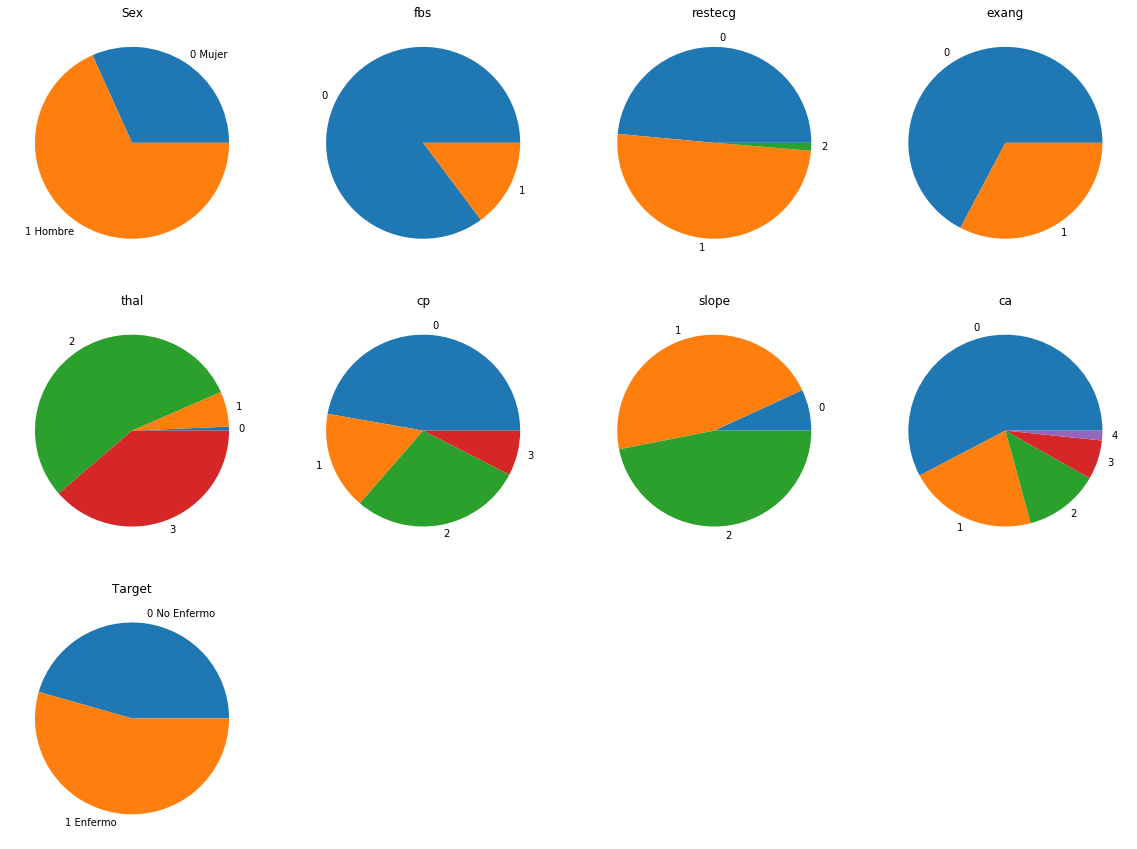

In [48]:
plt.figure(figsize=(20,15))

plt.subplot(3, 4, 1)
labels = ["0 Mujer", "1 Hombre"]
values = [trainx["sex"].count() - trainx["sex"].sum(), trainx["sex"].sum()]
plt.pie(values, labels=labels)
plt.title('Sex')

plt.subplot(3, 4, 2)
labels = ["0", "1"]
values = [trainx["fbs"].count() - trainx["fbs"].sum(), trainx["fbs"].sum()]
plt.pie(values, labels=labels)
plt.title('fbs')

plt.subplot(3, 4, 3)
labels = ["0", "1", "2"]
values = [trainx["restecg"][trainx["restecg"]==0].count(), trainx["restecg"][trainx["restecg"]==1].count(), trainx["restecg"][trainx["restecg"]==2].count()]
plt.pie(values, labels=labels)
plt.title('restecg')

plt.subplot(3, 4, 4)
labels = ["0", "1"]
values = [trainx["exang"].count() - trainx["exang"].sum(), trainx["exang"].sum()]
plt.pie(values, labels=labels)
plt.title('exang')

plt.subplot(3, 4, 5)
labels = ["0", "1", "2", "3"]
values = [trainx["thal"][trainx["thal"]==0].count(), trainx["thal"][trainx["thal"]==1].count(), trainx["thal"][trainx["thal"]==2].count(), trainx["thal"][trainx["thal"]==3].count()]
plt.pie(values, labels=labels)
plt.title('thal')

plt.subplot(3, 4, 6)
labels = ["0", "1", "2", "3"]
values = [trainx["cp"][trainx["cp"]==0].count(), trainx["cp"][trainx["cp"]==1].count(), trainx["cp"][trainx["cp"]==2].count(), trainx["cp"][trainx["cp"]==3].count()]
plt.pie(values, labels=labels)
plt.title('cp')

plt.subplot(3, 4, 7)
labels = ["0", "1", "2"]
values = [trainx["slope"][trainx["slope"]==0].count(), trainx["slope"][trainx["slope"]==1].count(), trainx["slope"][trainx["slope"]==2].count()]
plt.pie(values, labels=labels)
plt.title('slope')

plt.subplot(3, 4, 8)
labels = ["0", "1", "2", "3", "4"]
values = [trainx["ca"][trainx["ca"]==0].count(), trainx["ca"][trainx["ca"]==1].count(), trainx["ca"][trainx["ca"]==2].count(), trainx["ca"][trainx["ca"]==3].count(), trainx["ca"][trainx["ca"]==4].count()]
plt.pie(values, labels=labels)
plt.title('ca')

plt.subplot(3, 4, 9)
labels = ["0 No Enfermo", "1 Enfermo"]
values = [trainx["target"][trainx["target"]==0].count(), trainx["target"][trainx["target"]==1].count()]
plt.pie(values, labels=labels)
plt.title('Target')



In [83]:
# atributos y target
features = trainx[["age", "cp", "trestbps", "chol", "thalach", "oldpeak", "sex", "fbs", "restecg", "exang", "thal", "slope", "ca"]].values
target = trainx["target"].values

# Diviendo datos para entrenar es probar
trainX, testX, trainY, testY = train_test_split(features, target, test_size=0.2)
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

((242, 13), (242,))
((61, 13), (61,))


# Árbol de decisión

In [84]:
model1 = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 2)
#model1 = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 5, random_state = 1)
# model1 = tree.DecisionTreeClassifier()

model1 = model1.fit(trainX, trainY)

#Print the score on the train data
print("Train: " + str(model1.score(trainX, trainY)))
#Print the score on the test data
print("Test: " + str(model1.score(testX, testY)))

# Para árboles
# print(confusion_matrix(model1.predict(testX), testY))

# y_pred = model1.predict(testX)
# print(y_pred)

# print("Accuracy:",metrics.accuracy_score(testY, y_pred))

Train: 0.9380165289256198
Test: 0.8032786885245902


<h2>Matriz de confusión</h2>

In [85]:
confusion_matrix(model1.predict(testX), testY)

array([[27,  6],
       [ 6, 22]])

# Gráfica de Importancias y Árbol


(array([0.08778986, 0.36909987, 0.02753355, 0.05334666, 0.04165845,
       0.092471  , 0.03729616, 0.        , 0.02224626, 0.02119653,
       0.07541414, 0.        , 0.17194752]), 0.9108910891089109)


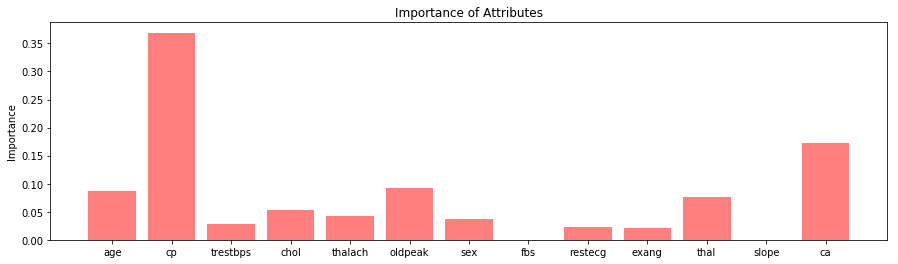

In [86]:
importances = model1.feature_importances_
print(importances, model1.score(features, target))

features_col = ["age", "cp", "trestbps", "chol", "thalach", "oldpeak", "sex", "fbs", "restecg", "exang", "thal", "slope", "ca"]

y_values = np.arange(len(features_col))

plt.figure(figsize=(15,4))
plt.bar(y_values, importances, align='center', alpha=0.5, color='r')
plt.xticks(y_values, features_col)
plt.ylabel('Importance')
plt.title('Importance of Attributes')

plt.show()

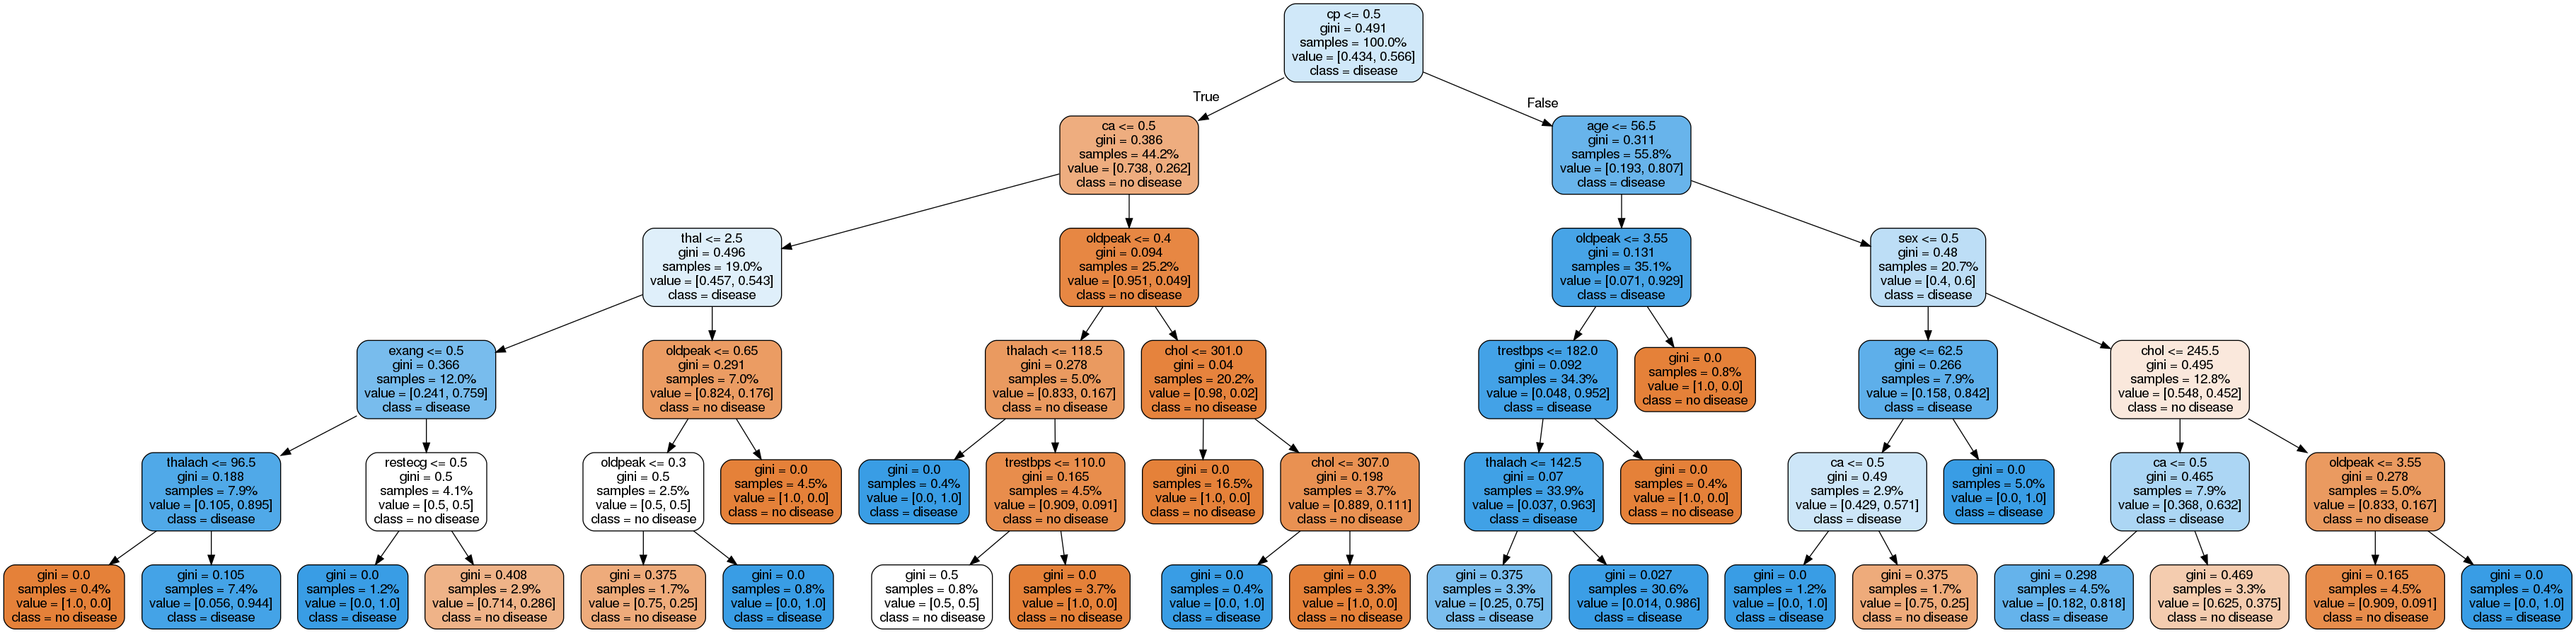

In [87]:

# c = -1;
# for i in importances:
#     c = c + 1
#     if(i == 0.0):
#         features_col.remove(features_col[c])
#         c = c - 1
    
        
        
# print(features_col)

y_train_str = trainY.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'

dot_data = StringIO()
export_graphviz(model1, out_file = dot_data, filled = True, rounded = True, proportion = True,
                feature_names = features_col, 
                class_names = y_train_str)


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


<h2>Interpretación</h2>

# Naive Bayes

In [99]:
model2 = gnb.fit(trainX, trainY)


#Print the score on the train data
print("Train: " + str(model2.score(trainX, trainY)))
#Print the score on the test data
print("Test: " + str(model2.score(testX, testY)))

# y_pred2 = model2.predict(testX)
# print(y_pred2)
# print("Accuracy: ",metrics.accuracy_score(testY, y_pred2))
# print(metrics.classification_report(testY, y_pred2))
# from sklearn.metrics import confusion_matrix



Train: 0.8471074380165289
Test: 0.819672131147541


<h2>Matriz de confusión</h2>

In [89]:
confusion_matrix(model2.predict(testX), testY)

array([[24,  2],
       [ 9, 26]])

# Red Neuronal

In [90]:
# NN is sensitive to data scale. We must normilize
scaler = StandardScaler()  
trainXX = trainX.copy()
testXX = testX.copy()
# Don't cheat - fit only on training data
scaler.fit(trainX)  
trainXX = scaler.transform(trainXX)  
# apply same transformation to test data
testXX = scaler.transform(testXX)  

model3 = MLPClassifier(solver='lbfgs', alpha=1e-3, activation = 'relu', max_iter=5000,
                     hidden_layer_sizes = (1), random_state=1, verbose = True)

model3.fit(trainXX, trainY)                         

#Print the score on the train data
print("On training")
print(model3.score(trainXX, trainY))
print(confusion_matrix(model3.predict(trainXX), trainY))

#Print the score on the test data
print("\nOn test")
print(model3.score(testXX, testY))
print(confusion_matrix(model3.predict(testXX), testY))

On training
0.859504132231405
[[ 81  10]
 [ 24 127]]

On test
0.819672131147541
[[25  3]
 [ 8 25]]


In [91]:
network = Sequential()
network.add(Dense(13, input_dim=13, activation='sigmoid'))
network.add(Dense(1, input_dim=13, activation='sigmoid'))
network.add(Dense(13, input_dim=13, activation='sigmoid'))


# network.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
network.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
# network.compile(loss='mean_squared_error', optimizer='adam', metrics=['binary_accuracy'])
# network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])


network.fit(trainX, trainY, epochs=1000)

scoreT = network.evaluate(testX, testY)
scoreE = network.evaluate(trainX, trainY)

print("Score del test")
print("%s: %.2f%%" % (network.metrics_names[1], scoreT[1]*100))
print("Score del entrenamiento")
print("%s: %.2f%%" % (network.metrics_names[1], scoreE[1]*100))

# predictions = network.predict_classes(testX)





Epoch 1/1000
242/242 [==============================] - 0s 1ms/step - loss: 2.5381 - binary_accuracy: 0.4949
Epoch 2/1000
242/242 [==============================] - 0s 60us/step - loss: 2.5282 - binary_accuracy: 0.4949
Epoch 3/1000
242/242 [==============================] - 0s 77us/step - loss: 2.5181 - binary_accuracy: 0.4949
Epoch 4/1000
242/242 [==============================] - 0s 81us/step - loss: 2.5082 - binary_accuracy: 0.4949
Epoch 5/1000
242/242 [==============================] - 0s 119us/step - loss: 2.4981 - binary_accuracy: 0.4949
Epoch 6/1000
242/242 [==============================] - 0s 190us/step - loss: 2.4878 - binary_accuracy: 0.4949
Epoch 7/1000
242/242 [==============================] - 0s 118us/step - loss: 2.4776 - binary_accuracy: 0.4949
Epoch 8/1000
242/242 [==============================] - 0s 85us/step - loss: 2.4670 - binary_accuracy: 0.4949
Epoch 9/1000
242/242 [==============================] - 0s 139us/step - loss: 2.4565 - binary_accuracy: 0.4949
Epoch 1

242/242 [==============================] - 0s 75us/step - loss: 1.6803 - binary_accuracy: 0.4542
Epoch 75/1000
242/242 [==============================] - 0s 75us/step - loss: 1.6700 - binary_accuracy: 0.4542
Epoch 76/1000
242/242 [==============================] - 0s 77us/step - loss: 1.6597 - binary_accuracy: 0.4542
Epoch 77/1000
242/242 [==============================] - 0s 62us/step - loss: 1.6495 - binary_accuracy: 0.4542
Epoch 78/1000
242/242 [==============================] - 0s 69us/step - loss: 1.6394 - binary_accuracy: 0.4542
Epoch 79/1000
242/242 [==============================] - 0s 72us/step - loss: 1.6294 - binary_accuracy: 0.4542
Epoch 80/1000
242/242 [==============================] - 0s 57us/step - loss: 1.6194 - binary_accuracy: 0.4542
Epoch 81/1000
242/242 [==============================] - 0s 60us/step - loss: 1.6096 - binary_accuracy: 0.4542
Epoch 82/1000
242/242 [==============================] - 0s 68us/step - loss: 1.5999 - binary_accuracy: 0.4542
Epoch 83/1000
2

242/242 [==============================] - 0s 70us/step - loss: 1.1425 - binary_accuracy: 0.4542
Epoch 148/1000
242/242 [==============================] - 0s 81us/step - loss: 1.1378 - binary_accuracy: 0.4542
Epoch 149/1000
242/242 [==============================] - 0s 63us/step - loss: 1.1332 - binary_accuracy: 0.4542
Epoch 150/1000
242/242 [==============================] - 0s 85us/step - loss: 1.1287 - binary_accuracy: 0.4542
Epoch 151/1000
242/242 [==============================] - 0s 73us/step - loss: 1.1242 - binary_accuracy: 0.4542
Epoch 152/1000
242/242 [==============================] - 0s 72us/step - loss: 1.1197 - binary_accuracy: 0.4542
Epoch 153/1000
242/242 [==============================] - 0s 75us/step - loss: 1.1154 - binary_accuracy: 0.4542
Epoch 154/1000
242/242 [==============================] - 0s 61us/step - loss: 1.1110 - binary_accuracy: 0.4542
Epoch 155/1000
242/242 [==============================] - 0s 88us/step - loss: 1.1068 - binary_accuracy: 0.4542
Epoch 1

242/242 [==============================] - 0s 62us/step - loss: 0.9170 - binary_accuracy: 0.4542
Epoch 221/1000
242/242 [==============================] - 0s 70us/step - loss: 0.9151 - binary_accuracy: 0.4542
Epoch 222/1000
242/242 [==============================] - 0s 85us/step - loss: 0.9132 - binary_accuracy: 0.4542
Epoch 223/1000
242/242 [==============================] - 0s 68us/step - loss: 0.9113 - binary_accuracy: 0.4542
Epoch 224/1000
242/242 [==============================] - 0s 82us/step - loss: 0.9095 - binary_accuracy: 0.4542
Epoch 225/1000
242/242 [==============================] - ETA: 0s - loss: 0.8870 - binary_accuracy: 0.326 - 0s 70us/step - loss: 0.9076 - binary_accuracy: 0.4542
Epoch 226/1000
242/242 [==============================] - 0s 77us/step - loss: 0.9058 - binary_accuracy: 0.4542
Epoch 227/1000
242/242 [==============================] - 0s 71us/step - loss: 0.9040 - binary_accuracy: 0.4542
Epoch 228/1000
242/242 [==============================] - 0s 62us/ste

242/242 [==============================] - 0s 75us/step - loss: 0.8198 - binary_accuracy: 0.4542
Epoch 293/1000
242/242 [==============================] - 0s 67us/step - loss: 0.8188 - binary_accuracy: 0.4542
Epoch 294/1000
242/242 [==============================] - 0s 80us/step - loss: 0.8179 - binary_accuracy: 0.4542
Epoch 295/1000
242/242 [==============================] - 0s 62us/step - loss: 0.8170 - binary_accuracy: 0.4542
Epoch 296/1000
242/242 [==============================] - 0s 75us/step - loss: 0.8161 - binary_accuracy: 0.4542
Epoch 297/1000
242/242 [==============================] - 0s 59us/step - loss: 0.8152 - binary_accuracy: 0.4542
Epoch 298/1000
242/242 [==============================] - 0s 69us/step - loss: 0.8144 - binary_accuracy: 0.4542
Epoch 299/1000
242/242 [==============================] - 0s 63us/step - loss: 0.8135 - binary_accuracy: 0.4542
Epoch 300/1000
242/242 [==============================] - 0s 78us/step - loss: 0.8126 - binary_accuracy: 0.4542
Epoch 3

242/242 [==============================] - 0s 57us/step - loss: 0.7700 - binary_accuracy: 0.4542
Epoch 366/1000
242/242 [==============================] - 0s 61us/step - loss: 0.7695 - binary_accuracy: 0.4542
Epoch 367/1000
242/242 [==============================] - 0s 76us/step - loss: 0.7690 - binary_accuracy: 0.4542
Epoch 368/1000
242/242 [==============================] - 0s 69us/step - loss: 0.7685 - binary_accuracy: 0.4542
Epoch 369/1000
242/242 [==============================] - 0s 65us/step - loss: 0.7680 - binary_accuracy: 0.4542
Epoch 370/1000
242/242 [==============================] - 0s 65us/step - loss: 0.7675 - binary_accuracy: 0.4542
Epoch 371/1000
242/242 [==============================] - 0s 61us/step - loss: 0.7671 - binary_accuracy: 0.4542
Epoch 372/1000
242/242 [==============================] - 0s 71us/step - loss: 0.7666 - binary_accuracy: 0.4542
Epoch 373/1000
242/242 [==============================] - 0s 87us/step - loss: 0.7661 - binary_accuracy: 0.4542
Epoch 3

242/242 [==============================] - 0s 78us/step - loss: 0.7417 - binary_accuracy: 0.4542
Epoch 439/1000
242/242 [==============================] - 0s 70us/step - loss: 0.7414 - binary_accuracy: 0.4542
Epoch 440/1000
242/242 [==============================] - 0s 76us/step - loss: 0.7411 - binary_accuracy: 0.4542
Epoch 441/1000
242/242 [==============================] - 0s 52us/step - loss: 0.7408 - binary_accuracy: 0.4542
Epoch 442/1000
242/242 [==============================] - 0s 69us/step - loss: 0.7406 - binary_accuracy: 0.4542
Epoch 443/1000
242/242 [==============================] - 0s 56us/step - loss: 0.7403 - binary_accuracy: 0.4542
Epoch 444/1000
242/242 [==============================] - 0s 64us/step - loss: 0.7400 - binary_accuracy: 0.4542
Epoch 445/1000
242/242 [==============================] - 0s 72us/step - loss: 0.7397 - binary_accuracy: 0.4542
Epoch 446/1000
242/242 [==============================] - 0s 70us/step - loss: 0.7394 - binary_accuracy: 0.4542
Epoch 4

242/242 [==============================] - 0s 53us/step - loss: 0.7241 - binary_accuracy: 0.4542
Epoch 512/1000
242/242 [==============================] - 0s 71us/step - loss: 0.7240 - binary_accuracy: 0.4542
Epoch 513/1000
242/242 [==============================] - 0s 68us/step - loss: 0.7238 - binary_accuracy: 0.4542
Epoch 514/1000
242/242 [==============================] - 0s 95us/step - loss: 0.7236 - binary_accuracy: 0.4542
Epoch 515/1000
242/242 [==============================] - 0s 55us/step - loss: 0.7234 - binary_accuracy: 0.4542
Epoch 516/1000
242/242 [==============================] - 0s 69us/step - loss: 0.7232 - binary_accuracy: 0.4542
Epoch 517/1000
242/242 [==============================] - 0s 68us/step - loss: 0.7230 - binary_accuracy: 0.4542
Epoch 518/1000
242/242 [==============================] - 0s 86us/step - loss: 0.7228 - binary_accuracy: 0.4542
Epoch 519/1000
242/242 [==============================] - 0s 72us/step - loss: 0.7226 - binary_accuracy: 0.4542
Epoch 5

242/242 [==============================] - 0s 64us/step - loss: 0.7125 - binary_accuracy: 0.4542
Epoch 585/1000
242/242 [==============================] - 0s 85us/step - loss: 0.7124 - binary_accuracy: 0.4542
Epoch 586/1000
242/242 [==============================] - 0s 77us/step - loss: 0.7122 - binary_accuracy: 0.4542
Epoch 587/1000
242/242 [==============================] - 0s 69us/step - loss: 0.7121 - binary_accuracy: 0.4542
Epoch 588/1000
242/242 [==============================] - 0s 74us/step - loss: 0.7120 - binary_accuracy: 0.4542
Epoch 589/1000
242/242 [==============================] - 0s 68us/step - loss: 0.7119 - binary_accuracy: 0.4542
Epoch 590/1000
242/242 [==============================] - 0s 99us/step - loss: 0.7117 - binary_accuracy: 0.4542
Epoch 591/1000
242/242 [==============================] - 0s 62us/step - loss: 0.7116 - binary_accuracy: 0.4542
Epoch 592/1000
242/242 [==============================] - 0s 68us/step - loss: 0.7115 - binary_accuracy: 0.4542
Epoch 5

242/242 [==============================] - 0s 83us/step - loss: 0.7046 - binary_accuracy: 0.4542
Epoch 657/1000
242/242 [==============================] - 0s 83us/step - loss: 0.7046 - binary_accuracy: 0.4542
Epoch 658/1000
242/242 [==============================] - 0s 86us/step - loss: 0.7045 - binary_accuracy: 0.4542
Epoch 659/1000
242/242 [==============================] - 0s 83us/step - loss: 0.7044 - binary_accuracy: 0.4542
Epoch 660/1000
242/242 [==============================] - 0s 78us/step - loss: 0.7043 - binary_accuracy: 0.4542
Epoch 661/1000
242/242 [==============================] - 0s 76us/step - loss: 0.7042 - binary_accuracy: 0.4542
Epoch 662/1000
242/242 [==============================] - 0s 72us/step - loss: 0.7041 - binary_accuracy: 0.4542
Epoch 663/1000
242/242 [==============================] - 0s 64us/step - loss: 0.7040 - binary_accuracy: 0.4542
Epoch 664/1000
242/242 [==============================] - 0s 64us/step - loss: 0.7039 - binary_accuracy: 0.4542
Epoch 6

242/242 [==============================] - 0s 95us/step - loss: 0.6991 - binary_accuracy: 0.4542
Epoch 730/1000
242/242 [==============================] - 0s 58us/step - loss: 0.6990 - binary_accuracy: 0.4542
Epoch 731/1000
242/242 [==============================] - 0s 84us/step - loss: 0.6990 - binary_accuracy: 0.4542
Epoch 732/1000
242/242 [==============================] - 0s 66us/step - loss: 0.6989 - binary_accuracy: 0.4542
Epoch 733/1000
242/242 [==============================] - ETA: 0s - loss: 0.6721 - binary_accuracy: 0.370 - 0s 94us/step - loss: 0.6988 - binary_accuracy: 0.4542
Epoch 734/1000
242/242 [==============================] - 0s 80us/step - loss: 0.6988 - binary_accuracy: 0.4542
Epoch 735/1000
242/242 [==============================] - 0s 67us/step - loss: 0.6987 - binary_accuracy: 0.4542
Epoch 736/1000
242/242 [==============================] - 0s 107us/step - loss: 0.6986 - binary_accuracy: 0.4542
Epoch 737/1000
242/242 [==============================] - 0s 80us/st

242/242 [==============================] - 0s 72us/step - loss: 0.6952 - binary_accuracy: 0.4542
Epoch 802/1000
242/242 [==============================] - 0s 55us/step - loss: 0.6952 - binary_accuracy: 0.4542
Epoch 803/1000
242/242 [==============================] - 0s 56us/step - loss: 0.6951 - binary_accuracy: 0.4542
Epoch 804/1000
242/242 [==============================] - 0s 51us/step - loss: 0.6951 - binary_accuracy: 0.4542
Epoch 805/1000
242/242 [==============================] - 0s 67us/step - loss: 0.6950 - binary_accuracy: 0.4542
Epoch 806/1000
242/242 [==============================] - 0s 55us/step - loss: 0.6950 - binary_accuracy: 0.4542
Epoch 807/1000
242/242 [==============================] - 0s 57us/step - loss: 0.6949 - binary_accuracy: 0.4542
Epoch 808/1000
242/242 [==============================] - 0s 56us/step - loss: 0.6949 - binary_accuracy: 0.4542
Epoch 809/1000
242/242 [==============================] - 0s 73us/step - loss: 0.6948 - binary_accuracy: 0.4542
Epoch 8

242/242 [==============================] - 0s 77us/step - loss: 0.6924 - binary_accuracy: 0.4542
Epoch 875/1000
242/242 [==============================] - 0s 70us/step - loss: 0.6923 - binary_accuracy: 0.4542
Epoch 876/1000
242/242 [==============================] - 0s 71us/step - loss: 0.6923 - binary_accuracy: 0.4542
Epoch 877/1000
242/242 [==============================] - ETA: 0s - loss: 0.7085 - binary_accuracy: 0.500 - 0s 157us/step - loss: 0.6923 - binary_accuracy: 0.4542
Epoch 878/1000
242/242 [==============================] - 0s 149us/step - loss: 0.6922 - binary_accuracy: 0.4542
Epoch 879/1000
242/242 [==============================] - 0s 166us/step - loss: 0.6922 - binary_accuracy: 0.4542
Epoch 880/1000
242/242 [==============================] - 0s 77us/step - loss: 0.6922 - binary_accuracy: 0.4542
Epoch 881/1000
242/242 [==============================] - 0s 87us/step - loss: 0.6921 - binary_accuracy: 0.4542
Epoch 882/1000
242/242 [==============================] - 0s 108us

242/242 [==============================] - 0s 62us/step - loss: 0.6903 - binary_accuracy: 0.4542
Epoch 947/1000
242/242 [==============================] - 0s 73us/step - loss: 0.6903 - binary_accuracy: 0.4542
Epoch 948/1000
242/242 [==============================] - 0s 70us/step - loss: 0.6903 - binary_accuracy: 0.4542
Epoch 949/1000
242/242 [==============================] - 0s 93us/step - loss: 0.6903 - binary_accuracy: 0.4542
Epoch 950/1000
242/242 [==============================] - 0s 153us/step - loss: 0.6902 - binary_accuracy: 0.4542
Epoch 951/1000
242/242 [==============================] - 0s 91us/step - loss: 0.6902 - binary_accuracy: 0.4542
Epoch 952/1000
242/242 [==============================] - 0s 84us/step - loss: 0.6902 - binary_accuracy: 0.4542
Epoch 953/1000
242/242 [==============================] - 0s 76us/step - loss: 0.6902 - binary_accuracy: 0.4542
Epoch 954/1000
242/242 [==============================] - 0s 79us/step - loss: 0.6902 - binary_accuracy: 0.4542
Epoch 

In [97]:
network.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 14        
_________________________________________________________________
dense_12 (Dense)             (None, 13)                26        
Total params: 222
Trainable params: 222
Non-trainable params: 0
_________________________________________________________________


In [94]:
for layer in network.layers:
    h=layer.get_weights()
    print (h)

[array([[ 0.20732242, -0.13974625, -0.31839907, -0.14392772, -0.3085534 ,
        -0.31121653,  0.4322714 ,  0.16449672,  0.3651713 ,  0.2426247 ,
        -0.02330394,  0.13979363,  0.03570348],
       [ 0.02313113,  0.13682821,  0.12739974,  0.05597961,  0.42299622,
        -0.18460464, -0.14290746,  0.06385922, -0.47106552, -0.40902722,
        -0.46835187, -0.15096216, -0.0786069 ],
       [-0.4803186 ,  0.23669699, -0.42189097, -0.21982297, -0.00061929,
         0.14522755, -0.20039524, -0.22718602,  0.2317649 , -0.4499251 ,
        -0.1951293 ,  0.3991112 ,  0.21262425],
       [-0.07388681, -0.48627228, -0.42120308, -0.45084915,  0.03454477,
         0.00424126,  0.13828708, -0.3002411 , -0.12352967, -0.42649803,
         0.29030472, -0.23534794,  0.16482556],
       [-0.34830835,  0.24357308, -0.23101954, -0.07636255, -0.18418604,
        -0.46597937, -0.00718144,  0.1690082 , -0.47331616,  0.18844599,
         0.06816784,  0.2800749 ,  0.24402726],
       [ 0.40217477,  0.26817